<a href="https://colab.research.google.com/github/mtaam/test/blob/master/BTES_hexagon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the packages required
import scipy.integrate as integrate
import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt
import math as ma

#input parameters

#------------------------------------------------------------------------------
# Thermal Properties of the Ground
#------------------------------------------------------------------------------

#Thermal conductivity of the soil (W/m.K)
k = 2.2

#Volumetric heat capacity of the soil (J/m^3.K)
cv = 2.95*10**6

#initial ground temperature (C)
initial_temp = 12


#------------------------------------------------------------------------------
# Properties of the heat transfer fluid
#------------------------------------------------------------------------------

#inlet water temperature (C) during injection period
Tinlet1 = 90

#inlet fluid temperature (C) during extraction period
Tinlet2 = 18

#specific heat capacity of the fluid (J/kg.C)
cp= 4200

#thermal conductivity of the fluid (W/m.K)
k_w = 0.6405

#fluid dynamic viscocity (kg/m.s)
u = 0.54741*10**-3

#fluid density (kg/m^3)
rho_fluid = 1000

#------------------------------------------------------------------------------
# Properties of the U-tube heat exchangers and the grout
#------------------------------------------------------------------------------

#borehole diameter (m)
bh_dia = 0.13

#inside diameter of the U-tube heat exchanger (mm)
di = 13.1

#outside diameter of the U-tube heat exchanger (mm)
do = 16

#distance between the two branches of the U-tube (mm)
D = 60

#thermal conductivity of the pipe (W/m.K)
k_pipe = 0.544

#thermal conductivity of the grout (W/m.K)
k_grout = 3.5

#------------------------------------------------------------------------------
#Borehole thermal energy storage (BTES array) parameters
#------------------------------------------------------------------------------

#boreholes spacing (m)
spacing = 2.5

#Depth of the borehole (m)
H = 50

#number of boreholes (Enter "7-5-3","9-7-5","11-9-7", etc for length1-2-3 for a hexagonal grid)
#let the breadth be equal to length3
length1 = 7
length2 = 5
length3 = 3
breadth = 3

#------------------------------------------------------------------------------
# BTES operating variables
#------------------------------------------------------------------------------

#mass flow rate of the fluid during injection (kg/sec)
m_in = 0.25

#mass flow rate of the fluid during extraction (kg/sec)
m_out = 0.25

#timestep (days)
ts = 1

#injection period (days)
t_inj = 182

#years
years = 5

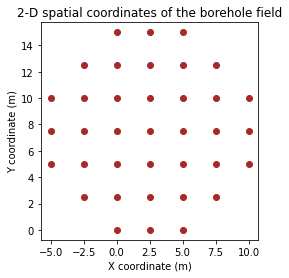

---------------------------------------------------
Thermal Properties of the ground
---------------------------------------------------
Thermal conductivity of the soil: 2.2 W/(m.K)
Volumetric heat capacity of the soil: 2950000.0 J/(m**3.K)
Initial ground temperature: 12 °C
Thermal diffusivity of the rock: 7.457627118644068e-07 m**2/s
---------------------------------------------------
Properties of the heat transfer fluid
---------------------------------------------------
Inlet fluid temperature during injection: 90 °C
Inlet fluid temperature during extraction: 18 °C
Specific heat capacity of the fluid: 4200 J/kg.K
Thermal conductivity of the fluid: 0.6405 W/(m.K)
Dynamic viscosity of the fluid: 0.0005474099999999999 kg/m.s
Fluid density 1000 kg/m**3
---------------------------------------------------
Properties of the U-tube heat exchangers
---------------------------------------------------
Borehole diameter: 0.13 m
Inside diameter of the U-tube: 13.1 mm
Outside diameter of the U-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:311: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:312: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:313: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this wi

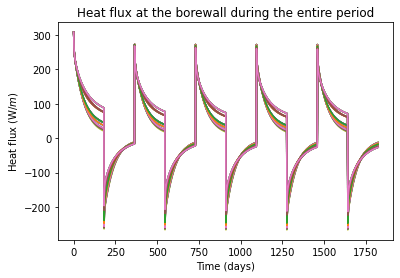

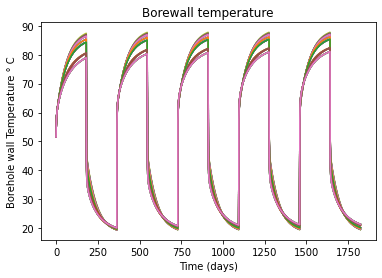

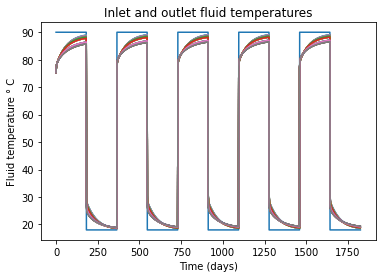

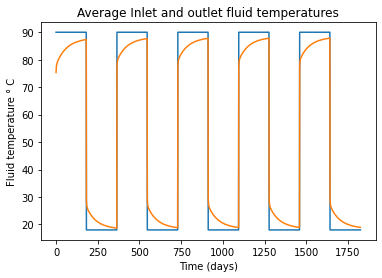

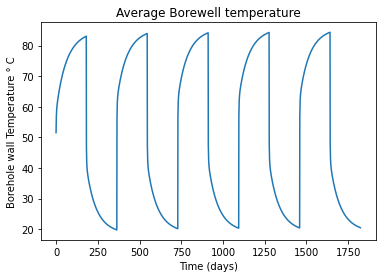

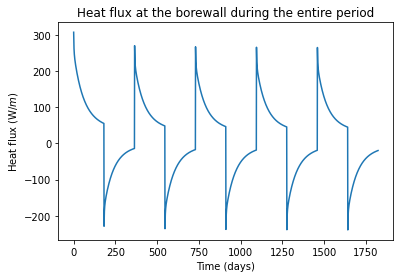

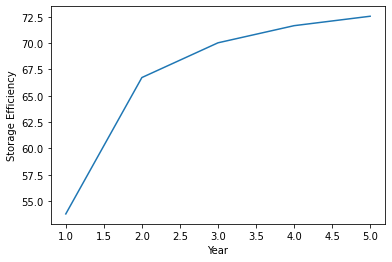

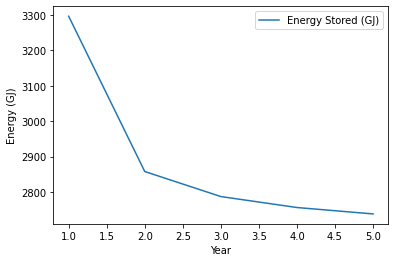

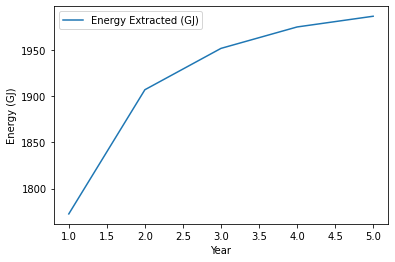

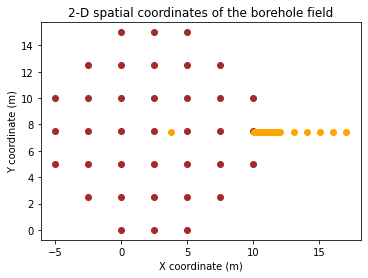

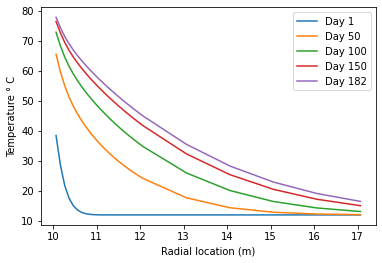

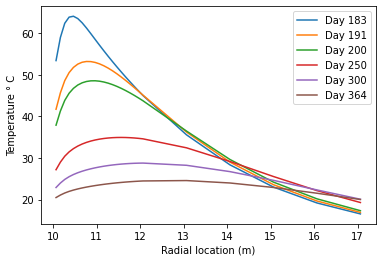

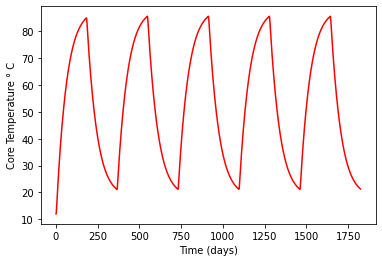

In [ ]:
#------------------------------------------------------------------------------

#extraction period (days)
t_ext = 365-t_inj

#end time (days)
et = 365*years

#Thermal diffusivity of the soil (m^2/s)
a = k/cv

#fluid temperature array
X = t_inj/ts
Y = t_ext/ts
Tin1 = [Tinlet1]*(int(X))
Tin2 = [Tinlet2]*(int(Y))
Tin = (Tin1+Tin2)*years
Tin = np.array(Tin,dtype='float')

#mass flow rate
m1 = [m_in]*(int(X))
m2 = [m_out]*(int(Y))
m = (m1+m2)*years
m = np.array(m,dtype='float')

#Borehole radius (m)
r = bh_dia/2

#inside diameter of the U-tube heat exchanger (m)
di1 = di/10**3

#outside diameter of the U-tube heat exchanger (m)
do1 = do/10**3

#distance between the two branches of the U-tube (m)
D1 = D/10**3

#------------------------------------------------------------------------------
# Evaluation of heat transfer properties
#------------------------------------------------------------------------------

#Reynolds number
Re = (4*m)/(np.pi*di1*u)

#Prandtl number
Pr = (cp*u)/k_w

#Nusselts number #n = 0.3 for storage 0.4 for extraction
nu = np.zeros([et])
nu[0:t_inj] = 0.023*(Re[0:t_inj]**0.8)*(Pr**0.3)
nu[t_inj:et]=  0.023*(Re[t_inj:et]**0.8)*(Pr**0.4)

#convective heat transfer coefficient (W/m^2.K)
h = nu*k_w/(di1)

#total borehole fluid to borehole resistance (m.K/W)
R_pipe = (1/(4*np.pi*k_pipe))*np.log(do1/di1)
R_fluid = 1/(2*np.pi*di1*h)
R_grout = (1/(4*np.pi*k_grout))*(np.log(bh_dia/do1)+np.log(bh_dia/D1)+((k_grout-k/k_grout+k)*np.log(bh_dia**4/(bh_dia**4-D1**4))))
R_total = R_pipe+R_fluid+R_grout


#------------------------------------------------------------------------------
#Generation of Hexagonal Borehole Array Coordinates
#------------------------------------------------------------------------------

#center rectangle coordinates
vertical = np.array(list(np.arange(0,breadth,1))*int(length1))*spacing
horizontal = np.repeat(np.array(list(np.arange(0,length1,1))), breadth)*spacing

#left
vertical1 = (np.array(list(np.arange(0,1,1))*int(length2))*spacing)-(1*spacing)
horizontal1 = np.repeat(np.array(list(np.arange(0,length2,1))), 1)*(1*spacing) +(1*spacing)
vertical2= (np.array(list(np.arange(0,breadth,1))*int(length3))*2.5)-(2*spacing)
horizontal2 = np.repeat(np.array(list(np.arange(0,length3,1))), breadth)*(1*spacing) +(2*spacing)

#right
vertical3 = (np.array(list(np.arange(0,1,1))*int(length2))*spacing)+(breadth*spacing)
horizontal3 = np.repeat(np.array(list(np.arange(0,length2,1))), 1)*(1*spacing) +(1*spacing)
vertical4= (np.array(list(np.arange(0,1,1))*int(length3))*2.5)+((breadth+1)*spacing)
horizontal4 = np.repeat(np.array(list(np.arange(0,length3,1))), 1)*(1*spacing) +(2*spacing)

#final coordinates
Vertical = np.concatenate((vertical,vertical1,vertical2,vertical3,vertical4), axis=0)
Horizontal = np.concatenate((horizontal,horizontal1,horizontal2,horizontal3,horizontal4), axis=0)

#storing the coordinates in a matrix
borehole_grid_coordinates = np.zeros([len(Vertical),2])
borehole_grid_coordinates[:,0] = Vertical
borehole_grid_coordinates[:,1] = Horizontal
borehole_grid_coordinates = np.unique(borehole_grid_coordinates,axis=0)

#plotting the BTES grid
plt.scatter(borehole_grid_coordinates[:,0],borehole_grid_coordinates[:,1],c ="brown")
plt.ylabel("Y coordinate (m)")
plt.xlabel("X coordinate (m)")
plt.title("2-D spatial coordinates of the borehole field")
plt.axis('scaled')
plt.show()

bf_no = len(borehole_grid_coordinates[:,0])

#------------------------------------------------------------------------------
#Displaying the parameters and the variables of the ground, fluid and the BTES array
#------------------------------------------------------------------------------

print("---------------------------------------------------")
print("Thermal Properties of the ground")
print("---------------------------------------------------")
print("Thermal conductivity of the soil:"+" " +str(k)+" "+"W/(m.K)")
print("Volumetric heat capacity of the soil:"+" " +str(cv)+" "+"J/(m**3.K)")
print("Initial ground temperature:"+" " +str(initial_temp)+" "+"\N{DEGREE SIGN}C")
print("Thermal diffusivity of the rock:"+" " +str(a)+" "+"m**2/s")
print("---------------------------------------------------")
print("Properties of the heat transfer fluid")
print("---------------------------------------------------")
print("Inlet fluid temperature during injection:"+" " +str(Tinlet1)+" "+"\N{DEGREE SIGN}C")
print("Inlet fluid temperature during extraction:"+" " +str(Tinlet2)+" "+"\N{DEGREE SIGN}C")
print("Specific heat capacity of the fluid:"+" " +str(cp)+" "+"J/kg.K")
print("Thermal conductivity of the fluid:"+" " +str(k_w)+" "+"W/(m.K)")
print("Dynamic viscosity of the fluid:"+" " +str(u)+" "+"kg/m.s")
print("Fluid density"+" " +str(rho_fluid)+" "+"kg/m**3")
print("---------------------------------------------------")
print("Properties of the U-tube heat exchangers")
print("---------------------------------------------------")
print("Borehole diameter:"+" " +str(bh_dia)+" "+"m")
print("Inside diameter of the U-tube:"+" " +str(di)+" "+"mm")
print("Outside diameter of the U-tube:"+" " +str(do)+" "+"mm")
print("Distance between the two branches of U-tube:"+" " +str(D)+" "+"mm")
print("Thermal conductivity of the pipe:"+" " +str(k_pipe)+" "+"W/(m.K)")
print("Thermal conductivity of the grout:"+" " +str(k_grout)+" "+"W/(m.K)")
print("---------------------------------------------------")
print("Borehole thermal energy storage array parameters")
print("---------------------------------------------------")
print("Number of boreholes:"+" " +str(bf_no))
print("Borehole spacing:"+" " +str(spacing)+" "+"m")
print("Borehole depth:"+" " +str(H)+" "+"m")
print("---------------------------------------------------")
print("BTES Operating variables")
print("---------------------------------------------------")
print("Mass flow rate of the during injection of the fluid:"+" " +str(m_in)+" "+"kg/sec")
print("Mass flow rate of the during extraction of the fluid:"+" " +str(m_out)+" "+"kg/sec")
print("Simulation timestep"+" " +str(ts)+" "+"day(s)")
print("Simulation end time"+" " +str(et/365)+" "+"years")

#Displaying the heat transfer properties, during injection and extraction

print("---------------------------------------------------")
print("Heat transfer properties")
print("---------------------------------------------------")
print("Prandtl number:"+" " +str(Pr))
print("Pipe thermal resistance:"+" " +str(R_pipe)+" "+"m.K/W")
print("Grout thermal resistance:"+" " +str(R_grout)+" "+"m.K/W")
print("---------------------------------------------------")
print("Injection Period")
print("---------------------------------------------------")
print("Reynolds number during injection:"+" " +str(Re[0]))
print("Nusselt number during injection:"+" " +str(nu[0]))
print("Convective heat transfer coefficient during injection:"+" " +str(h[0])+" "+"W/(m**2.K)")
print("Fluid thermal resistance during injection:"+" " +str(R_fluid[0])+" "+"m.K/W")
print("Total borehole thermal resistance during injection:"+" " +str(R_total[0])+" "+"m.K/W")
print("---------------------------------------------------")
print("Extraction Period")
print("---------------------------------------------------")
print("Reynolds number during extraction:"+" " +str(Re[364]))
print("Nusselt number during extraction:"+" " +str(nu[364]))
print("Convective heat transfer coefficient during extraction:"+" " +str(h[364])+" "+"W/(m**2.K)")
print("Fluid thermal resistance during extraction:"+" " +str(R_fluid[364])+" "+"m.K/W")
print("Total borehole thermal resistance during extraction:"+" " +str(R_total[364])+" "+"m.K/W")


#Displaying the length, breadth and the volume of the storage field
#print("---------------------------------------------------")
#print("BTES Array Dimensions")
##print("---------------------------------------------------")
#print("The BTES array radius is:"+" " +str(max(yy))+" "+"m")
#print("The BTES array surface area is:"+" " +str((2*np.pi*max(yy)*H)+(np.pi*2*max(yy)**2))+" "+"m**2")
#print("The Volume of the BTES array is:"+" " +str(np.pi*max(yy)**2*H)+" "+"m^3")

#------------------------------------------------------------------------------
#Computing the distance matrix of the coordinates
#------------------------------------------------------------------------------

distance_matrix = np.zeros([bf_no,bf_no])

for z in range(0,bf_no):
    for i in range(0,bf_no):
        distance_matrix[z,i] = (ma.sqrt((borehole_grid_coordinates[z,0]-borehole_grid_coordinates[i,0])**2+(borehole_grid_coordinates[z,1]-borehole_grid_coordinates[i,1])**2))+r


distance_index = list()

unq = np.unique(distance_matrix)
unique_distances = np.zeros([len(unq),2])
unique_distances[:,0] = unq

for i in range(0,len(unq)):
    distance_index.append(np.argwhere(distance_matrix == unq[i]))
    
#------------------------------------------------------------------------------
#Initializing the time, depth and radial variables from the input
#------------------------------------------------------------------------------

#time 
T = np.arange(3600*24*ts,3600*et*24,3600*24*ts)
time =  np.arange(ts,et,ts)

#Fourier number
F0 = a*T

#Depth coordinate 
Z = 0.5*H

#Radial coordinate
R = r

#Initializing the lists
g_function_list = list()
g_function_list2 = list()
g_function_list3 = list()
temperature_response = list()
borehole_temp = list()
outlet_temp = list()
average_temp = list()
heat_flux = list()
total_energy_stored = list()
incremental_q = list()
buffer = list()
#------------------------------------------------------------------------------
#computing the g-functions the array of boreholes for all the time steps
#------------------------------------------------------------------------------

distance_matrix2 = distance_matrix

for F in F0:
    buffer = list()
    for v,i in enumerate(unq):
            temperature_function = lambda H:(((special.erfc(ma.sqrt(i**2+(Z-H)**2)/(2*ma.sqrt(F))))/(ma.sqrt(i**2+(Z-H)**2)))-((special.erfc(ma.sqrt(i**2+(Z+H)**2)/(2*ma.sqrt(F))))/(ma.sqrt(i**2+(Z+H)**2))))
            results = integrate.quad(temperature_function,0,H)
            buffer.append(results[0])
            
    g_function_list.append(np.array(buffer)*(1/(4*np.pi*k)))
    

for j in range(0,len(g_function_list)):
    distance_matrix2 = np.zeros([bf_no,bf_no])
    for v,i in enumerate(unq):
        distance_matrix2[distance_matrix == i] = g_function_list[j][v] 
    g_function_list3.append(distance_matrix2)
    
g_function = g_function_list3[0]
g_function = np.array(g_function)


#------------------------------------------------------------------------------
#Setting up the system of linear equations and solving them for the BTES array
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
#Simulaneously solving the fluid and borehole heat exchanger's energy balance
#-------------------------------------------------------------------------------

Q = np.zeros([bf_no,et-1])
Q_prev = np.zeros([bf_no,et-1])
borehole_temp = np.zeros([bf_no,et-1])
temp_out = np.zeros([bf_no,et-1])
temp_pulse = np.zeros([bf_no,1])
temp_pulse_prev = np.zeros([bf_no,1])
temp_pulse[:,0] = initial_temp

for i in range(0,et-1):
    #initializing the matrices
    matrix1 = np.zeros([bf_no*2,bf_no*3])
    matrix2 = np.zeros([bf_no*2,1])
    matrix3 = np.zeros([bf_no,bf_no*3])
    matrix4 = np.zeros([bf_no,1])

    #initializing the indices
    index3 = 0
    index = 0
    index2 = 2

    #generating the matrix solve the problem
    for ii in range(0,bf_no*2,2):
        matrix1[ii,index3] = H #or H*2
        matrix1[ii,index3+1] = m[i]*cp
        matrix1[ii+1,index3] = -2*R_total[i]
        matrix1[ii+1,index3+1] = 1 
        matrix1[ii+1,index3+2] = -2
        index3 = index3+3

    for j in range(0,bf_no*2,2):
        matrix2[j,0] = m[i]*cp*Tin[i]
        matrix2[j+1,0] = -Tin[i]

    for j in range(0,bf_no*3,3):
        matrix3[:,j] = -g_function[:,index]
        matrix3[index,index2] = 1
        index2 = index2 + 3
        index = index + 1

    matrix4[:,0] = temp_pulse[:,0]

    #concatenating the final matrix
    final_matrix_A = np.concatenate((matrix1,matrix3))
    final_matrix_B = np.concatenate((matrix2,matrix4))

    #solving the set of simultaneous equations
    C = np.linalg.solve(final_matrix_A, final_matrix_B)

    #storing the fluxes,borehole temperature and outlet temperature of the fluid
    Q_prev[:,i] = list(C[np.arange(0,bf_no*3,3)])
    Q[:,i] = list(C[np.arange(0,bf_no*3,3)])
    borehole_temp[:,i] = list(C[np.arange(2,bf_no*3,3)])
    temp_out[:,i] = list(C[np.arange(1,bf_no*3,3)])
    
    #updating the previous temperature pulses
    temp_pulse_prev = np.zeros([bf_no,1])
    index4 = i

    if i == 0:
        z2 = np.multiply(Q_prev[:,0],np.array(g_function_list3[1]))
        temp_pulse_prev = z2 + temp_pulse_prev
    
    else:
        if i != et-2:
            for x in range(0,i+1):
                z2 = np.multiply((Q_prev[:,x]-Q_prev[:,x-1]),np.array(g_function_list3[index4+1]))
                temp_pulse_prev = z2 + temp_pulse_prev
                index4 = index4 - 1

    #updating the g-function addition term
    A1 = np.sum(np.multiply(Q_prev[:,i],np.array(g_function_list3[0])),axis=1)
    B1= np.sum(temp_pulse_prev,axis=1)
    temp_pulse[:,0] = initial_temp - A1 + B1
    
#------------------------------------------------------------------------------------------
#Plotting the results (Heat flux, Inlet and Outlet temperature and Borehole Wall Temperature)
#--------------------------------------------------------------------------------------------

#Heat flux plots during the entire period for each borehole
plt.ylabel("Heat flux (W/$m$)")
plt.xlabel("Time (days)")
plt.title("Heat flux at the borewall during the entire period")
for i in range(0,bf_no):
    plt.plot(Q_prev[i,:])   
plt.show()
    
#Borehole temperature plot
plt.ylabel("Borehole wall Temperature \N{DEGREE SIGN} C")
plt.xlabel("Time (days)")
plt.title("Borewall temperature")
for i in range(0,bf_no):
    plt.plot(borehole_temp[i,:])
plt.show()

#Inlet and Outlet temperature plots
plt.plot(Tin)
plt.ylabel("Fluid temperature \N{DEGREE SIGN} C")
plt.xlabel("Time (days)")
plt.title("Inlet and outlet fluid temperatures")
for i in range(0,bf_no):
    plt.plot(temp_out[i,:])
plt.show()

#Average inlet and outlet temperature plots
plt.plot(Tin)
plt.ylabel("Fluid temperature \N{DEGREE SIGN} C")
plt.xlabel("Time (days)")
plt.title("Average Inlet and outlet fluid temperatures")
plt.plot(np.mean(temp_out,axis=0))
plt.show()

#Average borehole temperature plot
plt.plot(np.mean(borehole_temp,axis=0))
plt.ylabel("Borehole wall Temperature \N{DEGREE SIGN} C")
plt.xlabel("Time (days)")
plt.title("Average Borewell temperature")
plt.show()

#Average Heat flux plot
plt.plot(np.mean(Q,axis=0))
plt.ylabel("Heat flux (W/$m$)")
plt.xlabel("Time (days)")
plt.title("Heat flux at the borewall during the entire period")
plt.show()

#Evaluating the energy stored and extracted
if years == 1:
    #evaluation of the Energy stored and extracted
    Total_Energy_Stored = np.sum(np.sum(Q[:,0:t_inj],axis=1)*H*86400*10**-9) #H*2
    Total_Energy_Extracted = np.sum(np.sum(Q[:,t_inj:365],axis=1)*H*86400*10**-9) #H*2
    print("total energy stored is equal to:"+" "+str(Total_Energy_Stored)+" "+"GJ")
    print("total energy extracted is equal to:"+" "+str(Total_Energy_Extracted)+" "+"GJ")
    print("The round trip thermal efficiency is:"+" "+str((-100*Total_Energy_Extracted)/Total_Energy_Stored))

if years > 1:
    #Displaying the total Energy stored and extracted
    m1 = 0
    m2 = 0
    m3 = 0
    m4 = 0
    energy_stored = np.zeros([3,years])
    for i in range(0,years):
        Total_Energy_Stored = np.sum(np.sum(Q[:,0+m1:t_inj+m2],axis=1)*H*86400*10**-9) #H*2
        Total_Energy_Extracted = np.sum(np.sum(Q[:,t_inj+m3:365+m4],axis=1)*H*86400*10**-9) #H*2
        energy_stored[0,i] = Total_Energy_Stored
        energy_stored[1,i] = Total_Energy_Extracted
        energy_stored[2,i] = (-100*Total_Energy_Extracted)/(Total_Energy_Stored)
        m1 = m1+365
        m2 = m2+365
        m3 = m3+365
        m4 = m4+365
    
    #print(energy_stored)
        
    plt.plot(np.arange(1,years+1,1),energy_stored[2,:])
    plt.ylabel("Storage Efficiency")
    plt.xlabel("Year")
    plt.show()
    
    plt.plot(np.arange(1,years+1,1),energy_stored[0,:],label='Energy Stored (GJ)')
    plt.ylabel("Energy (GJ)")
    plt.xlabel("Year")
    plt.legend()
    plt.show()
    
    plt.plot(np.arange(1,years+1,1),-energy_stored[1,:],label='Energy Extracted (GJ)')
    plt.ylabel("Energy (GJ)")
    plt.xlabel("Year")
    plt.legend()
    plt.show()
    
#------------------------------------------------------------------------------------------
#Evaluating the temperature profile at various radial locations in the rock
#--------------------------------------------------------------------------------------------

#assigning X-Y coordinates to the ground coordinates 
horizontal2 = np.array([spacing+0.5*spacing]+np.arange(max(Vertical)+r,max(Vertical)+r+2,0.1).tolist()+np.arange(max(Vertical)+r+2,max(Vertical)+r+8,1).tolist())
vertical2 = np.repeat(((max(Horizontal)+min(Horizontal))/2)-0.1,len(horizontal2))
borehole_grid_coordinates2 = np.zeros([len(vertical2),2])
borehole_grid_coordinates2[:,1] = vertical2
borehole_grid_coordinates2[:,0] = horizontal2

#displaying the radial coordinates studied
plt.scatter(borehole_grid_coordinates[:,0],borehole_grid_coordinates[:,1],c ="brown")
plt.scatter(borehole_grid_coordinates2[:,0],borehole_grid_coordinates2[:,1],c ="orange")
plt.ylabel("Y coordinate (m)")
plt.xlabel("X coordinate (m)")
plt.title("2-D spatial coordinates of the borehole field")
plt.axis('scaled')
plt.show()

#Computing the distance matrix
distance_matrix3 = np.zeros([len(borehole_grid_coordinates2[:,0]),len(borehole_grid_coordinates[:,0])])
for z in range(0,len(borehole_grid_coordinates2[:,0])):
    for i in range(0,len(borehole_grid_coordinates[:,0])):
        distance_matrix3[z,i] = (ma.sqrt((borehole_grid_coordinates[i,0]-borehole_grid_coordinates2[z,0])**2+(borehole_grid_coordinates[i,1]-borehole_grid_coordinates2[z,1])**2))

#unique distances
unq2 = np.unique(distance_matrix3)
unique_distances2 = np.zeros([len(unq2),2])
unique_distances2[:,0] = unq2

distance_index2 = list()
g_function_list4 = list()

for i in range(0,len(unq2)):
    distance_index2.append(np.argwhere(distance_matrix3 == unq2[i]))
    
    
#computing the g-function for the radial coordinates
distance_matrix4 = distance_matrix3

for F in F0:
    buffer2 = list()
    for v,i in enumerate(unq2):
            temperature_function2 = lambda H:(((special.erfc(ma.sqrt(i**2+(Z-H)**2)/(2*ma.sqrt(F))))/(ma.sqrt(i**2+(Z-H)**2)))-((special.erfc(ma.sqrt(i**2+(Z+H)**2)/(2*ma.sqrt(F))))/(ma.sqrt(i**2+(Z+H)**2))))
            results2 = integrate.quad(temperature_function2,0,H)
            buffer2.append(results2[0])
            
    g_function_list2.append(np.array(buffer2)*(1/(4*np.pi*k)))
    

for j in range(0,len(g_function_list2)):
    distance_matrix4 = np.zeros([len(borehole_grid_coordinates2[:,0]),len(borehole_grid_coordinates[:,0])])
    for v,i in enumerate(unq2):
        distance_matrix4[distance_matrix3 == i] = g_function_list2[j][v] 
    g_function_list4.append(distance_matrix4)
    
#evaluating the incremental fluxes
Q_increment = np.zeros([bf_no,et-2])
for x in range(0,et-2):
    if x == 0:
        Q_increment[:,x]= Q_prev[:,0]
    else:
        Q_increment[:,x] = Q_prev[:,x]-Q_prev[:,x-1]
        
#Computing the temperature profiles for the entire periods
temp_pulse_prev2 = np.zeros([len(borehole_grid_coordinates2[:,0]),et-1])

for m in range(0,et-1):
    temp_pulse_prev3 = np.zeros([len(borehole_grid_coordinates2[:,0]),1])
    z4 = np.zeros([len(borehole_grid_coordinates2[:,0]),1])  
    z3 = np.zeros([len(borehole_grid_coordinates2[:,0]),1])  
    index4 = m
    
    if m != et-2:
        for x in range(0,m+1):
            z3 = np.multiply((Q_increment[:,x]),np.array(g_function_list4[index4]))
            temp_pulse_prev3 = z3 + temp_pulse_prev3
            index4 = index4 - 1
    temp_pulse_prev2[:,m] = np.sum(temp_pulse_prev3,axis=1)  + initial_temp
    
#Displaying the temperature toprofile during the injection phase
plt.plot(horizontal2[1:len(horizontal2)],temp_pulse_prev2[1:len(horizontal2),0],label='Day 1')
plt.plot(horizontal2[1:len(horizontal2)],temp_pulse_prev2[1:len(horizontal2),49],label='Day 50')
plt.plot(horizontal2[1:len(horizontal2)],temp_pulse_prev2[1:len(horizontal2),99],label='Day 100')
plt.plot(horizontal2[1:len(horizontal2)],temp_pulse_prev2[1:len(horizontal2),149],label='Day 150')
plt.plot(horizontal2[1:len(horizontal2)],temp_pulse_prev2[1:len(horizontal2),181],label='Day 182')
plt.ylabel("Temperature \N{DEGREE SIGN} C")
plt.xlabel("Radial location (m)")
plt.legend()
plt.show()

#Displaying the temperature profiles during the extraction phase
plt.plot(horizontal2[1:len(horizontal2)],temp_pulse_prev2[1:len(horizontal2),182],label='Day 183')
plt.plot(horizontal2[1:len(horizontal2)],temp_pulse_prev2[1:len(horizontal2),190],label='Day 191')
plt.plot(horizontal2[1:len(horizontal2)],temp_pulse_prev2[1:len(horizontal2),199],label='Day 200')
plt.plot(horizontal2[1:len(horizontal2)],temp_pulse_prev2[1:len(horizontal2),249],label='Day 250')
plt.plot(horizontal2[1:len(horizontal2)],temp_pulse_prev2[1:len(horizontal2),299],label='Day 300')
plt.plot(horizontal2[1:len(horizontal2)],temp_pulse_prev2[1:len(horizontal2),363],label='Day 364')
plt.ylabel("Temperature \N{DEGREE SIGN} C")
plt.xlabel("Radial location (m)")
plt.legend()
plt.show()

#Displaying the core temperature
plt.plot(np.arange(1,len(temp_pulse_prev2[0,:]),1),temp_pulse_prev2[0,0:len(temp_pulse_prev2[0,:])-1],color="red")
plt.ylabel("Core Temperature \N{DEGREE SIGN} C")
plt.xlabel("Time (days)")
plt.show()

print2 = np.arange(1,len(temp_pulse_prev2[0,:]),1)